# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("env.txt")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth= 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# Fetch current ETH price

btc_url = btc_url + "?format=json"
etc_url = eth_url + "?format=json"

btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)

btc_data = btc_response_data.json()
eth_data = eth_response_data.json()

print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(btc_price)
print(eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19521918,
            "total_supply": 19521918,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 30899.0,
                    "volume_24h": 19837638274,
                    "market_cap": 602196295411,
                    "percentage_change_1h": 0.282388256504638,
                    "percentage_change_24h": 3.53863302669444,
                    "percentage_change_7d": 9.59061414562799,
                    "percent_change_1h": 0.282388256504638,
                    "percent_change_24h": 3.53863302669444,
                    "percent_change_7d": 9.59061414562799
                }
            },
            "last_updated": 1698076798
        }
    },
    "metadata": {
        "timestamp": 1698076798,
        "num_cryptoc

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv("env.txt")

# Create the Alpaca API object
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_portfolio

# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2020-07-14 04:00:00+00:00  118.67  118.74  118.58       14582  118.58   

                                                   SPY                 \
                            volume        vwap   close    high    low   
timestamp                                                               
2020-07-14 04:00:00+00:00  4295871  118.667416  318.93  319.76  312.0   

                                                                    
                          trade_count   open    volume        vwap  
timestamp                                                           
2020-07-14 04:00:00+00:00      580272  313.3  94625450  316.274678

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.93


/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_25551/4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_25551/4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15946.50
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
##Hint:** The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values:

value_data = {
    "SPY": [my_spy_value],
    "AGG": [my_agg_value],
    "BTC": [my_btc_value],
    "ETH": [my_eth_value],
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data)

# Display savings DataFrame
display(df_savings)

,SPY,AGG,BTC,ETH
0,15946.5,23734.0,37078.8,8896.951


<Axes: title={'center': 'Current Value in Dollars of Stock Portfolio'}>

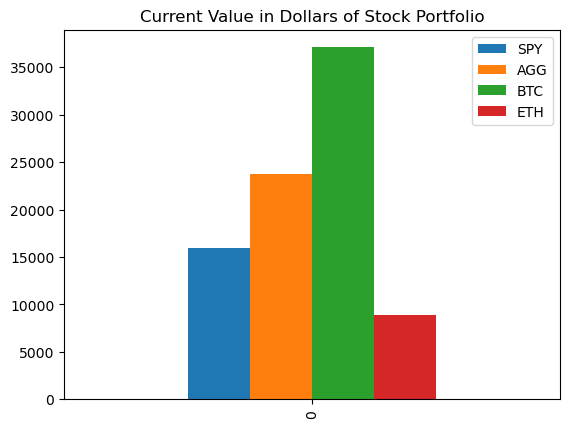

In [12]:
# Plot savings pie chart
#df_savings.plot.pie(y="O", title="Current Value in Dollars of Stock Portfolio")
df_savings.plot.bar(title="Current Value in Dollars of Stock Portfolio")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings=my_spy_value+my_agg_value+my_btc_value+my_eth_value

# Calculate difference in funds
fund_difference = total_savings - emergency_fund

# Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

if total_savings > emergency_fund:
    print(f"Congratulations, you have enough money in this fund")
if total_savings == emergency_fund:
    print(f"Congratulations, you have reached your financial goal")
if total_savings < emergency_fund:
    print(f"Unfortunatley, you are ${fund_difference}")


Congratulations, you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Sample results may vary from the solution based on the time frame chosen

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2018-10-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-18', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 year's worth of historical price data for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()
df_ticker.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_ticker_2 = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_ticker_2.head()

AGG                                         \
                            close      high      low trade_count    open   
timestamp                                                                  
2018-10-18 04:00:00+00:00  104.46  104.6195  104.375       13495  104.39   
2018-10-19 04:00:00+00:00  104.37  104.5500  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.5200  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.7400  104.475       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.8100  104.670       17520  104.69   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2018-10-18 04:00:00+00:00  3550735  104.496375  276.3900  280.07  274.97   
2018-10-19 04:00:00+00:00  3105921  104.390878  276.1797  279.30  275.47   
2018-10-22 04:00:00+00:00  2948119  104.408492  275.0300  277.36  274.41   
2018-10-23 04:00:00+00:00  3695313  104.605860  273.5200  274.87  268.61   
2018-10-24 04:00:00+00:00  4849462  104.742653  265.2100  273.76  264.70   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-10-18 04:00:00+00:00      747569  279.40  137804219  277.099534  
2018-10-19 04:00:00+00:00      582243  277.13  140662678  277.063759  
2018-10-22 04:00:00+00:00      449535  277.00   83420677  275.565255  
2018-10-23 04:00:00+00:00      837023  270.95  148031789  271.959702  
2018-10-24 04:00:00+00:00      938613  273.33  180061325  269.071189

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker_2,
    weights = [.50,.50],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                            close      high      low trade_count    open   
timestamp                                                                  
2018-10-18 04:00:00+00:00  104.46  104.6195  104.375       13495  104.39   
2018-10-19 04:00:00+00:00  104.37  104.5500  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.5200  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.7400  104.475       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.8100  104.670       17520  104.69   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2018-10-18 04:00:00+00:00  3550735  104.496375          NaN  276.3900  280.07   
2018-10-19 04:00:00+00:00  3105921  104.390878    -0.000862  276.1797  279.30   
2018-10-22 04:00:00+00:00  2948119  104.408492    -0.000192  275.0300  277.36   
2018-10-23 04:00:00+00:00  3695313  104.605860     0.001246  273.5200  274.87   
2018-10-24 04:00:00+00:00  4849462  104.742653     0.002584  265.2100  273.76   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-10-18 04:00:00+00:00  274.97      747569  279.40  137804219  277.099534   
2018-10-19 04:00:00+00:00  275.47      582243  277.13  140662678  277.063759   
2018-10-22 04:00:00+00:00  274.41      449535  277.00   83420677  275.565255   
2018-10-23 04:00:00+00:00  268.61      837023  270.95  148031789  271.959702   
2018-10-24 04:00:00+00:00  264.70      938613  273.33  180061325  269.071189   

                                        
                          daily_return  
timestamp                               
2018-10-18 04:00:00+00:00          NaN  
2018-10-19 04:00:00+00:00    -0.000761  
2018-10-22 04:00:00+00:00    -0.004163  
2018-10-23 04:00:00+00:00    -0.005490  
2018-10-24 04:00:00+00:00    -0.030382

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989316,0.992260,1.004058,0.994055,1.012926,0.995047,1.008576,0.994643,1.004150,1.002634,...,0.998197,0.999147,1.010412,1.000292,0.990594,0.996113,1.012796,0.995142,1.011794,1.007834
2,0.999868,0.995833,1.011072,0.999628,1.010653,0.995614,1.004739,1.002168,1.001303,1.017662,...,1.000188,0.997027,1.020586,1.004657,0.992752,0.999681,1.015413,0.994525,1.016561,1.000829
3,0.995967,0.992192,1.023949,0.997507,1.019530,1.003236,1.007127,0.999022,1.008094,1.015642,...,1.008595,0.990459,1.022952,1.012706,0.996414,1.004972,1.013329,0.996879,1.020512,0.983415
4,1.000017,1.002118,1.020594,1.000547,1.017547,1.000081,1.007212,0.996818,1.011366,1.004336,...,1.013895,1.003839,1.032703,0.999892,0.980049,0.996205,1.021869,0.995306,1.028979,0.985763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.830681,4.227915,8.020874,1.586326,1.835896,2.828019,11.516784,0.708023,1.056194,2.271677,...,1.597092,4.261695,1.228491,3.936213,6.247795,3.630711,2.737878,2.192485,10.810756,9.516088
7557,4.833961,4.238779,7.996554,1.566712,1.847225,2.824549,11.542436,0.705308,1.051749,2.272766,...,1.597965,4.283482,1.221765,3.938194,6.149746,3.651116,2.724387,2.207567,10.848888,9.492793
7558,4.856277,4.238131,8.029646,1.568650,1.873897,2.802761,11.417493,0.694452,1.031295,2.263584,...,1.601931,4.336169,1.233237,3.941780,6.087019,3.627053,2.709864,2.214963,10.836962,9.486986
7559,4.857291,4.249971,8.028474,1.589881,1.851967,2.789111,11.401811,0.698906,1.034569,2.237165,...,1.604761,4.327883,1.250202,3.918777,6.076278,3.632408,2.704835,2.194746,10.727613,9.532333


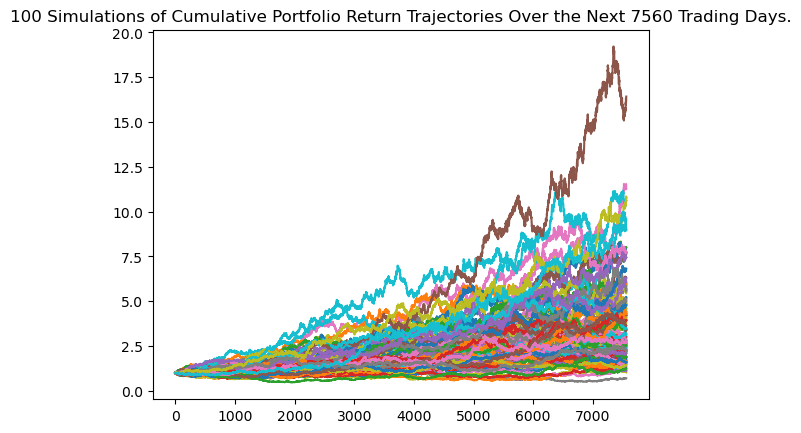

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

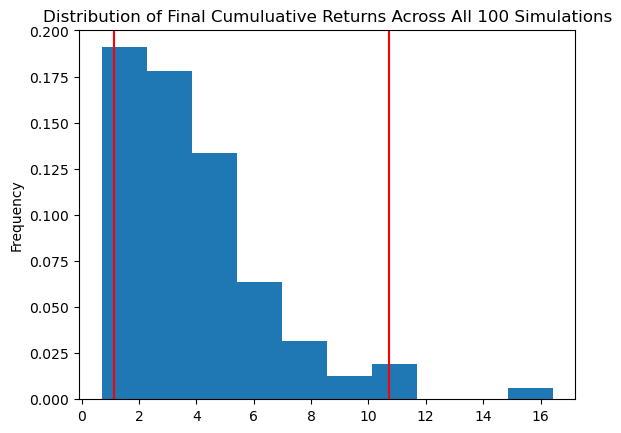

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              3.886079
std               2.620161
min               0.701239
25%               2.117738
50%               3.106328
75%               4.837172
max              16.420309
95% CI Lower      1.129737
95% CI Upper     10.702562
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22594.75 and $214051.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33892.12 and $321076.85


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2018-10-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-18', tz='America/New_York').isoformat()

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 year's worth of historical price data for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()
df_ticker.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_ticker_3 = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_ticker_3.head()

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker_3,
    weights = [.50,.50],
    num_simulation = 100,
    num_trading_days = 252*5
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


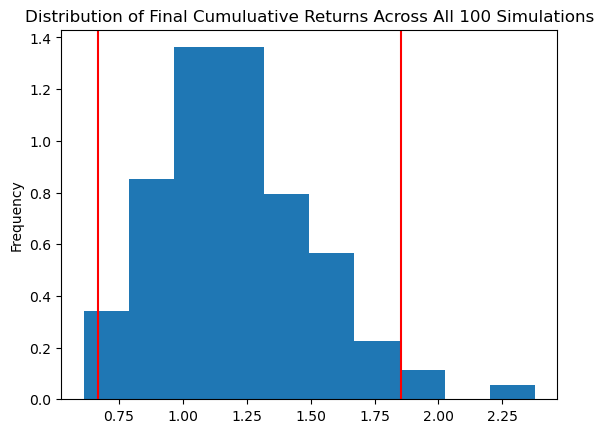

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.204348
std               0.303908
min               0.614393
25%               1.025329
50%               1.168263
75%               1.363915
max               2.376691
95% CI Lower      0.670849
95% CI Upper      1.853561
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $40250.96 and $111213.68


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [34]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
    #  f" over the next 10 years will end within in the range of"
   #   f" ${ci_lower_ten} and ${ci_upper_ten}")